In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

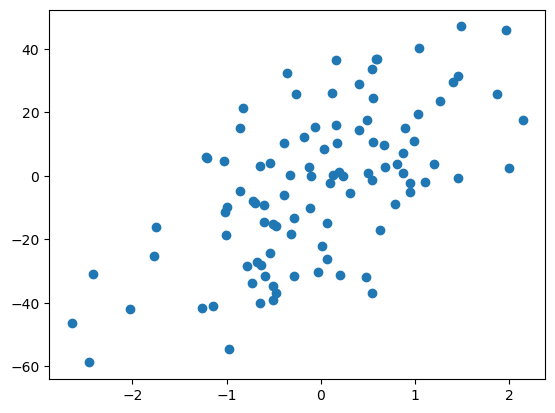

In [3]:
plt.scatter(X,y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr=LinearRegression()

In [19]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[15.98734498]
-4.08780539204631


In [20]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.10979572881434085

In [21]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m=46.27
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        #calculate b using GD
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
        print(self.b)
        print(self.m)

    def predict(self,X):
        return self.m*X + self.b

In [22]:
gd=GDRegressor(0.01,10)

In [23]:
gd.fit(X_train,y_train)

-4.825371144602399
15.74378690309754


In [24]:
gd=GDRegressor(0.01,50)
gd.fit(X_train,y_train)

-4.087805395399851
15.987344982990486


In [25]:
y_pred=gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.10979572875103549